**Student ID:** 210251353 , **Student Name:** Bassam El Koussa<br>

# Section 1: Framing ML problems


## 1.3 Methodology (Continuation of Group Methodology)

The classification is categorical (or discrete) unlike the regression which is numerical (or continuous) [3]. The required output is to predict an accident status wethere it is severe or not, which is a classification problem based on discrete values. The next step is to review some papers and previous machine learning works related to predicting road accident severity and causality features by using machine learning techniques. The random forest algorithm had proved to be a popular choice by reaching an accuracy of 73% [2]. The test results showed that the Random Forest (RF) achieved an accuracy of 75.5% which seemed to be better than Logistic Regression (LR), Naïve Bayesian Classifier (NB), and AdaBoost algorithms. [1] The RF was found to be the best models that had the highest overall predicting accuracy of 53.9% compared to KNN, DT, SVM, OP and MNL [4]. Most of researchers highlighted a critical issue which is the imbalance where they had applied some oversampling, undersampling and stratified techniques to ensure bias reduction in prediction algortihms. <br><br>

[1] https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8717393 
[2] https://www.mdpi.com/2073-431X/10/12/157/pdf <br>
[3] https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7 <br>
[4] https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8486945&tag=1 <br>
Some syntax, codes, pipeline and algorithms have been used from several portfolios and blogs: <br> https://www.kaggle.com/jingzongwang/usa-car-accidents-severity-prediction <br>
https://www.kaggle.com/code/sid321axn/stacked-ensemble-for-heart-disease-classification/notebook <br>
https://www.kaggle.com/code/saurabhshahane/voting-classifier <br>
https://www.kaggle.com/code/sid321axn/stacked-ensemble-for-heart-disease-classification/notebook

# Section 2: Designing Data Preparation
## 2.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb #Downloaded package in Environmnet before run of this notebook
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc

## 2.2 Collect and Load Data

In [2]:
df_1 = pd.read_csv("dft-road-casualty-statistics-accident-2020.csv") #Load First Dataset Accident-2020

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_2 = pd.read_csv("dft-road-casualty-statistics-casualty-2020.csv") #Load Second Dataset Casualty-2020

In [4]:
df_3 = pd.read_csv("dft-road-casualty-statistics-vehicle-2020.csv") #Load Third Dataset Vehicle-2020

In [5]:
df_1.nunique() #Check number of unique values in each attribute

accident_index                                  9332
accident_year                                      1
accident_reference                             91199
location_easting_osgr                          75403
location_northing_osgr                         75498
longitude                                      89589
latitude                                       88748
police_force                                      44
accident_severity                                  3
number_of_vehicles                                13
number_of_casualties                              16
date                                             366
day_of_week                                        7
time                                            1438
local_authority_district                         377
local_authority_ons_district                     378
local_authority_highway                          206
first_road_class                                   6
first_road_number                             

In [6]:
df_2.nunique()

accident_index                         9372
accident_year                             1
accident_reference                    91199
vehicle_reference                        12
casualty_reference                       43
casualty_class                            3
sex_of_casualty                           4
age_of_casualty                         101
age_band_of_casualty                     12
casualty_severity                         3
pedestrian_location                      12
pedestrian_movement                      11
car_passenger                             5
bus_or_coach_passenger                    7
pedestrian_road_maintenance_worker        4
casualty_type                            21
casualty_home_area_type                   4
casualty_imd_decile                      11
dtype: int64

In [7]:
df_3.nunique()

accident_index                       9374
accident_year                           1
accident_reference                  91200
vehicle_reference                      14
vehicle_type                           20
towing_and_articulation                 8
vehicle_manoeuvre                      20
vehicle_direction_from                 11
vehicle_direction_to                   11
vehicle_location_restricted_lane       12
junction_location                      11
skidding_and_overturning                8
hit_object_in_carriageway              14
vehicle_leaving_carriageway            11
hit_object_off_carriageway             14
first_point_of_impact                   7
vehicle_left_hand_drive                 4
journey_purpose_of_driver               7
sex_of_driver                           4
age_of_driver                          99
age_band_of_driver                     12
engine_capacity_cc                    985
propulsion_code                        11
age_of_vehicle                    

In [8]:
#Select required features from first dataset, accident reference will be used as a key for merge later
df_1 = df_1[['accident_reference','longitude', 'latitude', 'first_road_class','speed_limit','road_surface_conditions', 
             'light_conditions', 'weather_conditions', 'day_of_week', 'accident_severity'] ]

In [9]:
#Select required features from seconnd dataset, accident reference will be used as a key for merge later
df_2 = df_2[['accident_reference','casualty_class']]

In [10]:
#Select required features from third dataset, accident reference will be used as a key for merge later
df_3 = df_3[['accident_reference','age_of_vehicle', 'age_of_driver', 'sex_of_driver', 'engine_capacity_cc' ]]

In [11]:
#Merge using accident refrence as a key
df = pd.merge(df_1,df_2, on='accident_reference', how = 'inner')

In [12]:
#Merge using accident refrence as a key again
df=pd.merge(df,df_3, on='accident_reference', how = 'inner')

In [13]:
df.head() #Selected required attributes from each dataset and merge them based on primary key accident_reference

,accident_reference,longitude,latitude,first_road_class,speed_limit,road_surface_conditions,light_conditions,weather_conditions,day_of_week,accident_severity,casualty_class,age_of_vehicle,age_of_driver,sex_of_driver,engine_capacity_cc
0,10278554,-0.108858,51.403761,5,20,2,4,1,2,2,1,-1,23,1,-1
1,10278554,-0.108858,51.403761,5,20,2,4,1,2,2,1,4,23,1,113
2,10278556,-0.145519,51.546549,5,30,9,1,1,4,2,1,4,17,1,125
3,10278556,-0.145519,51.546549,5,30,9,1,1,4,2,1,4,35,3,1968
4,10278558,-0.066682,51.497938,3,20,2,4,1,2,3,1,0,45,1,125


In [14]:
df = df.drop('accident_reference', axis=1) #Dropped accident_reference which is generated randomly, no significance 

In [15]:
df.head() #13 predictors and 1 target output which is the accident severity

,longitude,latitude,first_road_class,speed_limit,road_surface_conditions,light_conditions,weather_conditions,day_of_week,accident_severity,casualty_class,age_of_vehicle,age_of_driver,sex_of_driver,engine_capacity_cc
0,-0.108858,51.403761,5,20,2,4,1,2,2,1,-1,23,1,-1
1,-0.108858,51.403761,5,20,2,4,1,2,2,1,4,23,1,113
2,-0.145519,51.546549,5,30,9,1,1,4,2,1,4,17,1,125
3,-0.145519,51.546549,5,30,9,1,1,4,2,1,4,35,3,1968
4,-0.066682,51.497938,3,20,2,4,1,2,3,1,0,45,1,125


## 2.3 Exploratory Data Analysis
### 2.3.1 Data Preparation

In [16]:
df.isnull().sum() #few null values due to reporting it differently as per Road-Safety-Open-Dataset-Data-Guide.xlx

longitude                  34
latitude                   34
first_road_class            0
speed_limit                 0
road_surface_conditions     0
light_conditions            0
weather_conditions          0
day_of_week                 0
accident_severity           0
casualty_class              0
age_of_vehicle              0
age_of_driver               0
sex_of_driver               0
engine_capacity_cc          0
dtype: int64

In [17]:
df=df.replace(-1, np.NaN) #Identify missing values by using META guidance, -1 value is common for all features

In [18]:
#Identify missing values in each attribute separately by using META guidance
df['first_road_class'] = df['first_road_class'].replace(6,np.NaN)
df['speed_limit'] = df['speed_limit'].replace(99,np.NaN)
df['road_surface_conditions'] = df['road_surface_conditions'].replace(9,np.NaN)
df['light_conditions'] = df['light_conditions'].replace(7,np.NaN)
df['weather_conditions'] = df['weather_conditions'].replace(8,np.NaN)
df['weather_conditions'] = df['weather_conditions'].replace(9,np.NaN)
df['sex_of_driver'] = df['sex_of_driver'].replace(3,np.NaN)

In [19]:
df.isnull().sum() #Identified all missing values in dataframe

longitude                     34
latitude                      34
first_road_class           61333
speed_limit                   11
road_surface_conditions      935
light_conditions            3140
weather_conditions          7428
day_of_week                    0
accident_severity              0
casualty_class                 0
age_of_vehicle             40636
age_of_driver              19133
sex_of_driver              14083
engine_capacity_cc         41146
dtype: int64

In [20]:
#Identify the weight of missing values in each feature
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
0,longitude,0.019206
1,latitude,0.019206
2,first_road_class,34.646715
3,speed_limit,0.006214
4,road_surface_conditions,0.528177
5,light_conditions,1.773771
6,weather_conditions,4.196041
10,age_of_vehicle,22.955080
11,age_of_driver,10.808139
12,sex_of_driver,7.955418


In [21]:
#Eliminate this feature due to high percentage of missing values, above threshold of 25% that might affect quality
df = df.drop('first_road_class', axis=1) 

In [22]:
#Eliminate rows with missing values, no replacement by mean, mode or median to avoid adding bias to data
df = df.dropna() 

In [23]:
df.isnull().sum() #Double check the missing value

longitude                  0
latitude                   0
speed_limit                0
road_surface_conditions    0
light_conditions           0
weather_conditions         0
day_of_week                0
accident_severity          0
casualty_class             0
age_of_vehicle             0
age_of_driver              0
sex_of_driver              0
engine_capacity_cc         0
dtype: int64

In [24]:
df.info() #Check count and type of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119540 entries, 1 to 177023
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   longitude                119540 non-null  float64
 1   latitude                 119540 non-null  float64
 2   speed_limit              119540 non-null  float64
 3   road_surface_conditions  119540 non-null  float64
 4   light_conditions         119540 non-null  float64
 5   weather_conditions       119540 non-null  float64
 6   day_of_week              119540 non-null  int64  
 7   accident_severity        119540 non-null  int64  
 8   casualty_class           119540 non-null  int64  
 9   age_of_vehicle           119540 non-null  float64
 10  age_of_driver            119540 non-null  float64
 11  sex_of_driver            119540 non-null  float64
 12  engine_capacity_cc       119540 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 12.8 MB


In [25]:
df.nunique() #longitude, latidue, age_of_vehicle, age_of_driver, engine_capacity_cc are numerical, rest categorical

longitude                  55399
latitude                   55290
speed_limit                    6
road_surface_conditions        5
light_conditions               4
weather_conditions             7
day_of_week                    7
accident_severity              3
casualty_class                 3
age_of_vehicle                72
age_of_driver                 89
sex_of_driver                  2
engine_capacity_cc           896
dtype: int64

In [26]:
#Combine the severe class by merging severe and fatal under 1 which means severe, and 0 for non-severe
df['accident_severity'] = df['accident_severity'].map({1:1, 2:1, 3:0})

In [27]:
df.nunique() #reduce the accident severity classes to binary, 1 for severe and 0 for non-severe

longitude                  55399
latitude                   55290
speed_limit                    6
road_surface_conditions        5
light_conditions               4
weather_conditions             7
day_of_week                    7
accident_severity              2
casualty_class                 3
age_of_vehicle                72
age_of_driver                 89
sex_of_driver                  2
engine_capacity_cc           896
dtype: int64

In [28]:
df.describe().T #General Statistics

,count,mean,std,min,25%,50%,75%,max
longitude,119540.0,-1.380033,1.395308,-7.412812,-2.258736,-1.425562,-0.305739,1.756257
latitude,119540.0,52.454733,1.304516,49.970479,51.418774,52.309234,53.442480,60.541144
speed_limit,119540.0,41.143299,15.147558,20.000000,30.000000,30.000000,60.000000,70.000000
road_surface_conditions,119540.0,1.359495,0.551159,1.000000,1.000000,1.000000,2.000000,5.000000
light_conditions,119540.0,1.990305,1.658306,1.000000,1.000000,1.000000,4.000000,6.000000
weather_conditions,119540.0,1.337770,0.920459,1.000000,1.000000,1.000000,1.000000,7.000000
day_of_week,119540.0,4.124444,1.951217,1.000000,2.000000,4.000000,6.000000,7.000000
accident_severity,119540.0,0.246495,0.430972,0.000000,0.000000,0.000000,0.000000,1.000000
casualty_class,119540.0,1.349364,0.593019,1.000000,1.000000,1.000000,2.000000,3.000000
age_of_vehicle,119540.0,8.398452,5.664964,0.000000,4.000000,8.000000,13.000000,96.000000


### 2.3.2 Univariate Analysis

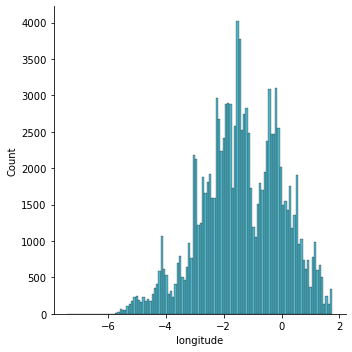

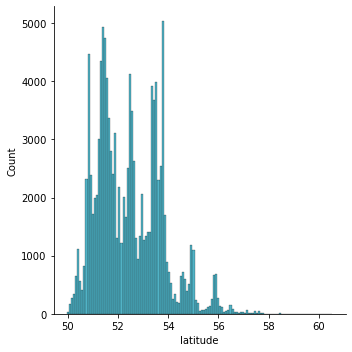

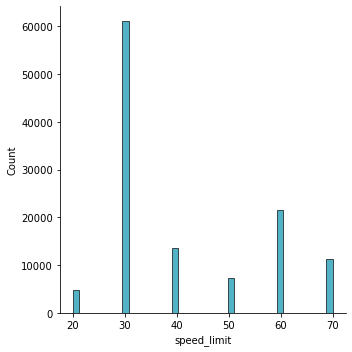

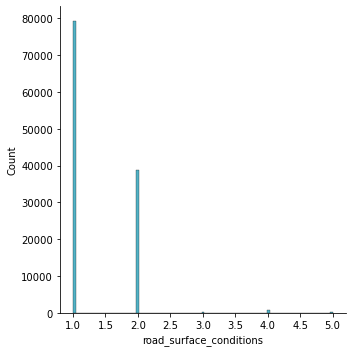

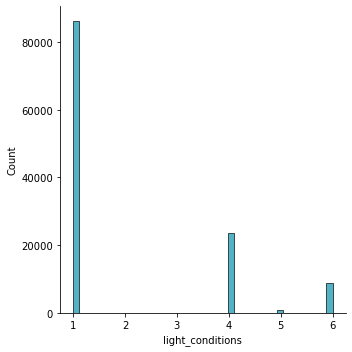

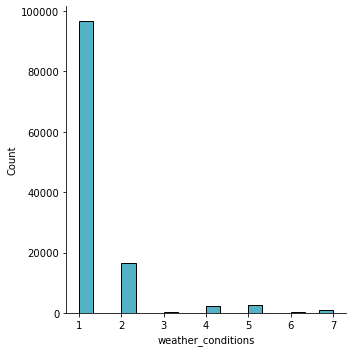

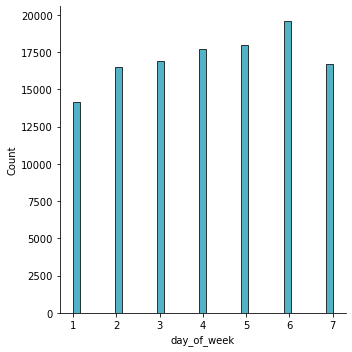

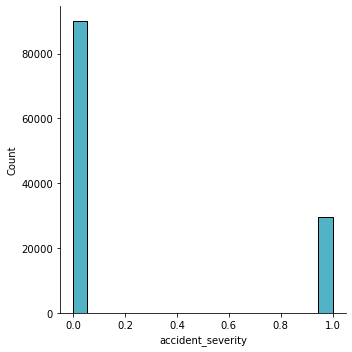

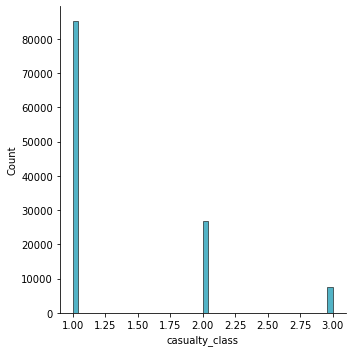

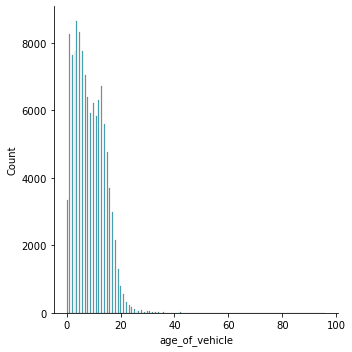

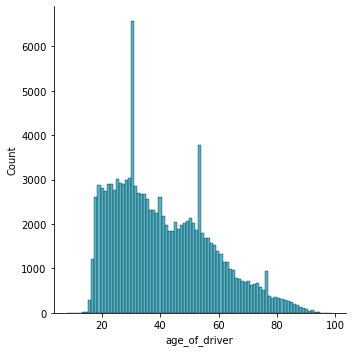

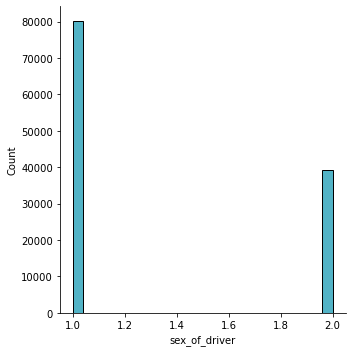

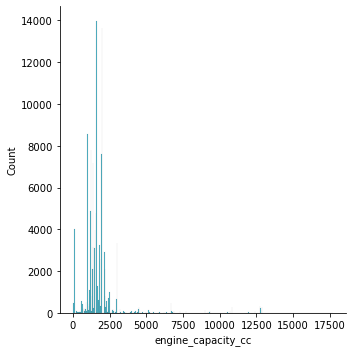

In [29]:
#All continous attributes have skewness and all categorical attributes have imbalance
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'int64' or 'float64': # Only apply for columns with integer strings
        sns.displot(df[feature], color = '#189AB4')
        plt.show()

In [30]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.longitude),stats.skew(df.latitude), 
                                       stats.skew(df.age_of_vehicle), stats.skew(df.age_of_driver), 
                                       stats.skew(df.engine_capacity_cc) ]},
                        index=['longitude','latitude','age_of_vehicle','age_of_driver','engine_capacity_cc'])  
# Measure the skeweness of the required columns
Skewness

,Skewness
longitude,-0.243445
latitude,0.703158
age_of_vehicle,1.066186
age_of_driver,0.634584
engine_capacity_cc,5.083346


**Observation:** charts for continuous value are skewed due to high number of outliers and the categorical features have imbalance. The data needs some treatment to have better results with ML algorithms.

### 2.3.3 Bivariate Analysis

In [31]:
# Separate Categorical from Continuous
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

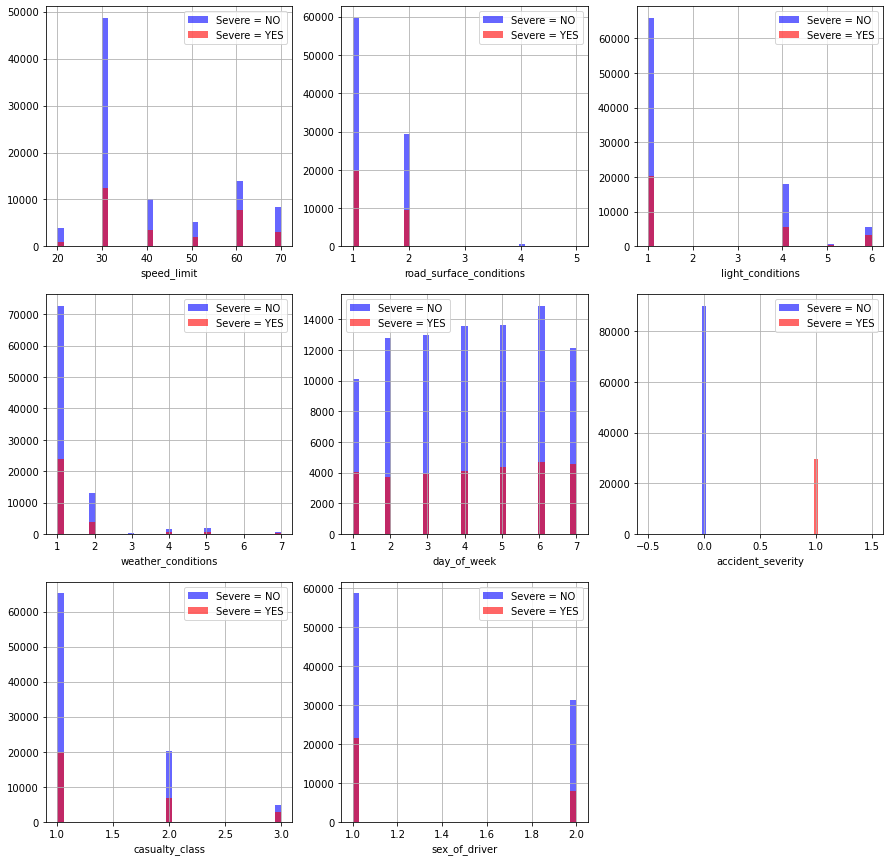

In [32]:
# Plot Categorical Variables Vs Target
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df['accident_severity'] == 0][column].hist(bins=35, color='blue', label='Severe = NO', alpha=0.6)
    df[df['accident_severity'] == 1][column].hist(bins=35, color='red', label='Severe = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

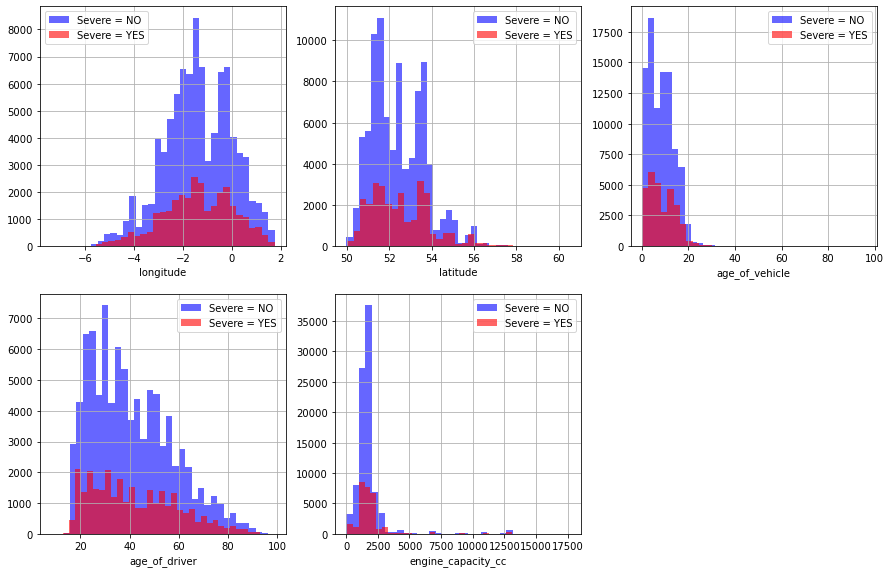

In [33]:
# Plot Continuous Variables Vs Target
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df['accident_severity'] == 0][column].hist(bins=35, color='blue', label='Severe = NO', alpha=0.6)
    df[df['accident_severity'] == 1][column].hist(bins=35, color='red', label='Severe = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Observation:** Speed limit 60, no light, and accidents envolving pederstrian show high percentage of serverity accidents. Also, the charts show high imbalance in target mainly and predictors as well.

<AxesSubplot:>

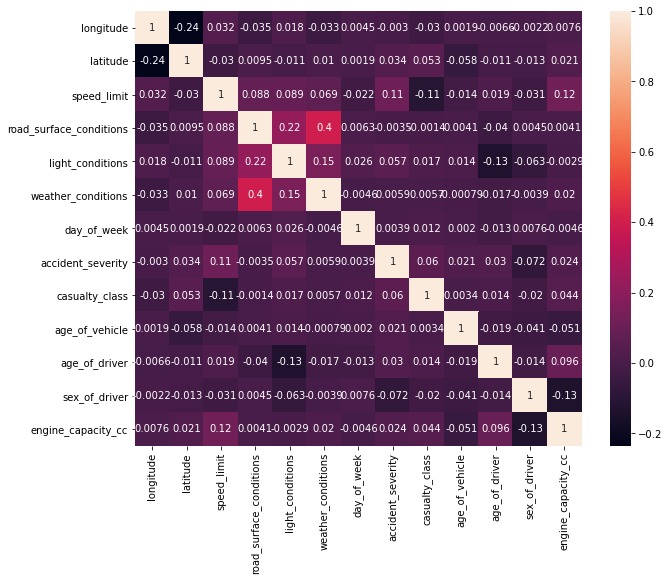

In [34]:
#Correlation Matrix, weak correlation between features and target. 
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(),annot=True)

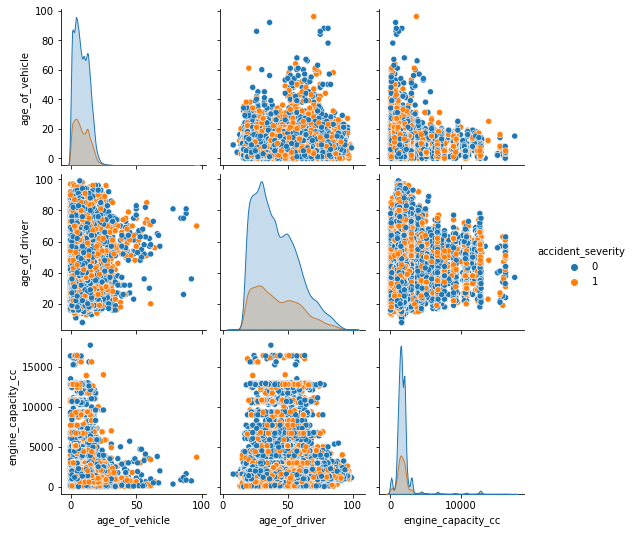

In [35]:
sns.pairplot(df, hue = 'accident_severity', vars = ['age_of_vehicle', 'age_of_driver', 
                                                   'engine_capacity_cc'] )

**Observation:** Speed limit has the highest correlation with accident severity but it is still low. Very weak relationship between attributes of this dataset.

### 2.3.4 Outlier Detection

Q1 25 percentile of the given age data is,  -2.258736
Q2 50 percentile of the given age data is,  -1.425562
Q3 75 percentile of the given age data is,  -0.305739

IQR =  1.9529969999999999


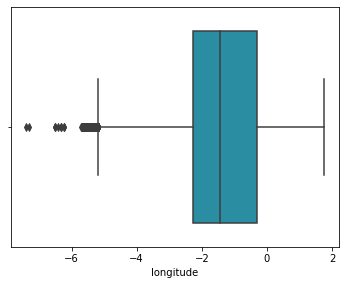

In [36]:
Q1 = np.percentile(df.longitude, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.longitude, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.longitude, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given age data is, ', Q1) 
print('Q2 50 percentile of the given age data is, ', Q2) 
print('Q3 75 percentile of the given age data is, ', Q3) 
  
IQR = Q3 - Q1 
print()
print('IQR = ', IQR) 

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.longitude, color='#189AB4')

plt.show()

Q1 25 percentile of the given age data is,  51.418774
Q2 50 percentile of the given age data is,  52.309234
Q3 75 percentile of the given age data is,  53.44248

IQR =  2.0237060000000042


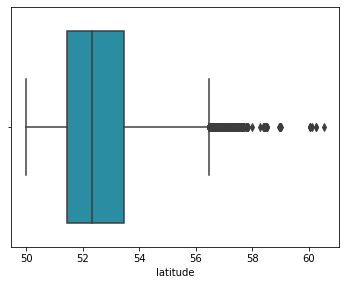

In [37]:
Q1 = np.percentile(df.latitude, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.latitude, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.latitude, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given age data is, ', Q1) 
print('Q2 50 percentile of the given age data is, ', Q2) 
print('Q3 75 percentile of the given age data is, ', Q3) 
  
IQR = Q3 - Q1 
print()
print('IQR = ', IQR) 

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.latitude, color='#189AB4')

plt.show()

Q1 25 percentile of the given age data is,  4.0
Q2 50 percentile of the given age data is,  8.0
Q3 75 percentile of the given age data is,  13.0

IQR =  9.0


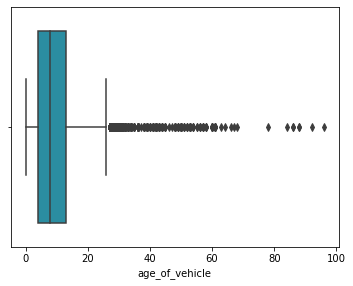

In [38]:
Q1 = np.percentile(df.age_of_vehicle, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.age_of_vehicle, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.age_of_vehicle, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given age data is, ', Q1) 
print('Q2 50 percentile of the given age data is, ', Q2) 
print('Q3 75 percentile of the given age data is, ', Q3) 
  
IQR = Q3 - Q1 
print()
print('IQR = ', IQR) 

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.age_of_vehicle, color='#189AB4')

plt.show()

Q1 25 percentile of the given age data is,  27.0
Q2 50 percentile of the given age data is,  38.0
Q3 75 percentile of the given age data is,  53.0

IQR =  26.0


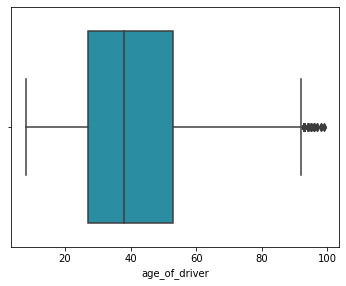

In [39]:
Q1 = np.percentile(df.age_of_driver, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.age_of_driver, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.age_of_driver, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given age data is, ', Q1) 
print('Q2 50 percentile of the given age data is, ', Q2) 
print('Q3 75 percentile of the given age data is, ', Q3) 
  
IQR = Q3 - Q1 
print()
print('IQR = ', IQR) 

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.age_of_driver, color='#189AB4')

plt.show()

Q1 25 percentile of the given age data is,  1248.0
Q2 50 percentile of the given age data is,  1596.0
Q3 75 percentile of the given age data is,  1995.0

IQR =  747.0


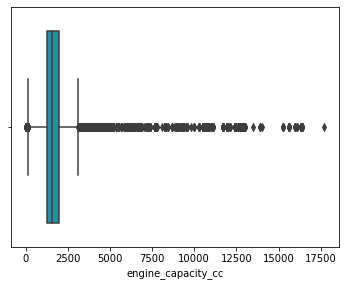

In [40]:
Q1 = np.percentile(df.engine_capacity_cc, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.engine_capacity_cc, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.engine_capacity_cc, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given age data is, ', Q1) 
print('Q2 50 percentile of the given age data is, ', Q2) 
print('Q3 75 percentile of the given age data is, ', Q3) 
  
IQR = Q3 - Q1 
print()
print('IQR = ', IQR) 

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.engine_capacity_cc, color='#189AB4')

plt.show()

**Observation:** High number of outliers for continous attributes, removing or replacing them will reduce/change the data significantly  which might result in misleading representation of the population. Decision to maintain outliers as part of the data

### 2.3.5 Map Plotting

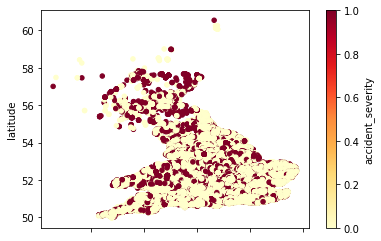

In [41]:
df.plot(x="longitude", y="latitude", kind="scatter", c="accident_severity", colormap="YlOrRd")
plt.show()

**Observation:** High imbalance betweeen severe and not severe targets, also high numbers of severe cases in two geographic spots located in north and west of the United Kingdom.

### 2.3.6 Target Separation

In [42]:
#standarise data type to float since longitude and latitude cannot be represented with any other type
df = df.astype(float) 
X = df.drop('accident_severity',axis=1)     # Set feature vector
y = df['accident_severity']   #Set Target variable

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119540 entries, 1 to 177023
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   longitude                119540 non-null  float64
 1   latitude                 119540 non-null  float64
 2   speed_limit              119540 non-null  float64
 3   road_surface_conditions  119540 non-null  float64
 4   light_conditions         119540 non-null  float64
 5   weather_conditions       119540 non-null  float64
 6   day_of_week              119540 non-null  float64
 7   accident_severity        119540 non-null  float64
 8   casualty_class           119540 non-null  float64
 9   age_of_vehicle           119540 non-null  float64
 10  age_of_driver            119540 non-null  float64
 11  sex_of_driver            119540 non-null  float64
 12  engine_capacity_cc       119540 non-null  float64
dtypes: float64(13)
memory usage: 12.8 MB


In [44]:
#The split of features has been done at this stage because no fit or transformation have been done earlier
X.head(2)

,longitude,latitude,speed_limit,road_surface_conditions,light_conditions,weather_conditions,day_of_week,casualty_class,age_of_vehicle,age_of_driver,sex_of_driver,engine_capacity_cc
1,-0.108858,51.403761,20.0,2.0,4.0,1.0,2.0,1.0,4.0,23.0,1.0,113.0
4,-0.066682,51.497938,20.0,2.0,4.0,1.0,2.0,1.0,0.0,45.0,1.0,125.0


In [45]:
y.head(2)

1    1.0
4    0.0
Name: accident_severity, dtype: float64

In [46]:
y.value_counts() #High difference between counts of output variables

0.0    90074
1.0    29466
Name: accident_severity, dtype: int64

<AxesSubplot:ylabel='accident_severity'>

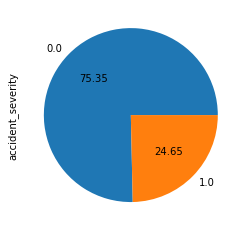

In [47]:
y.value_counts().plot.pie(autopct='%.2f') #High imbalance between severe and not severe case

### 2.3.7 Handling Data Imbalance

Imbalanced data is a problem when creating a predictive machine learning model. Despite having high accuracy score, the prediction algorithm tends to output 0 value (non-severe). Overall, the recall score and F1 score remained low. For this reason, decision has been made to balance the training set wether through stratified sampling or by oversampling the minority data. We have used multiple techniques as mentioned in following comments: <br>
1- Stratified Train and Test: No Imporovement compared to random train and test, recall score was very low.<br>
2- Oversampling: We have used SMOTE, SMOTE Borderline, ADASYN to imporve the recall score.<br>
The for this exercise, will keep the SMOTE oversampling as it proved very good improvements in recall score.

In [48]:
#Oversample the data by creating synthetic data using the SMOTE technique. 
sm = SMOTE(random_state=42)

In [49]:
X_sm, y_sm = sm.fit_resample(X, y)

In [50]:
y_sm.value_counts()

0.0    90074
1.0    90074
Name: accident_severity, dtype: int64

<AxesSubplot:ylabel='accident_severity'>

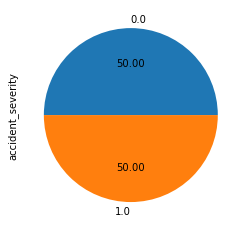

In [51]:
y_sm.value_counts().plot.pie(autopct='%.2f')

### 2.3.8 Features Transformation

In [52]:
# 1- Using Random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25 ,random_state=42)

In [53]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(y_sm.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(y_sm.index)) * 100))

75.00% data is in training set
25.00% data is in test set


In [54]:
#Normalization: Tried MinMaxScaler(), RobustScaler() & StandardScaler(). MinMaxScaler() showed best result
mms = MinMaxScaler() 

In [55]:
#Fit and Transform Train ony, apply transformation on test setI don't 
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

### 2.3.9 Principal Component Analysis

In [56]:
# Will be using the standard sclar along with pca to reduce dimensionality of features, an area to exploit.
sc = StandardScaler() 
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
pca = PCA()
X_train_pca = pca.fit(X_train_sc)

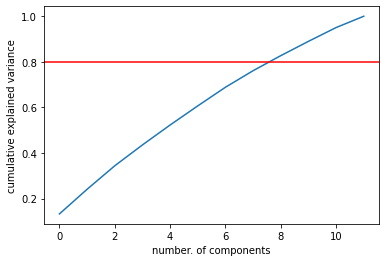

In [57]:
#The below chart explains the cumulative variance based on number of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number. of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='-')

In [58]:
#Based on cumulative explained variance chart above, 8 features represent the most of the data, reduction by 33%
num_components = 8
pca = PCA(num_components)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
X_test_pca.shape

(45037, 8)

# Section 3: Developing ML models
## 3.1 Baseline Models

In [62]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2', random_state=42)))
    basedModels.append(('CART' , DecisionTreeClassifier(random_state=42)))
    basedModels.append(('AB'   , AdaBoostClassifier(random_state=42)))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt', random_state=42)))
    basedModels.append(('BC'   , BaggingClassifier( n_estimators=50, random_state=42)))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy', random_state=42)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini', random_state=42)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100, random_state=42 )))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500, random_state=42)))
    basedModels.append(('XGB1000'   , xgb.XGBClassifier(n_estimators= 1000, random_state=42)))
    basedModels.append(('XGB2000'   , xgb.XGBClassifier(n_estimators= 2000, random_state=42)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models, source Kaggle
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [61]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models) 

LR_L2: 0.582306 (0.003792)
CART: 0.820703 (0.003867)
AB: 0.736446 (0.003698)
GBM: 0.764756 (0.002198)
BC: 0.878500 (0.003900)
RF_Ent100: 0.890727 (0.003533)
RF_Gini100: 0.890623 (0.003726)
ET100: 0.901155 (0.003190)
ET500: 0.902887 (0.003178)
XGB1000: 0.901599 (0.002047)
XGB2000: 0.912346 (0.001453)


**Observation**<br>
The following classifiers and ensemble classifiers have been selected based on achieving the highest score through cross-validation: <br>
**XGBClassifier** <br>
**ExtraTreesClassifier** <br>
**RandomForest**<br>
**BaggingClassifier** <br>
In the next section, we will dive deep in evaluating the model performance and will take the **RandomForest** as a baseline model for the BaggingClassifier.

## 3.2 Evaluating Selected Models

In [63]:
CART = DecisionTreeClassifier(random_state=42)
CART = CART.fit(X_train, y_train)
y_pred_CART = CART.predict(X_test)
print(classification_report(y_test,y_pred_CART))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83     22419
         1.0       0.82      0.84      0.83     22618

    accuracy                           0.83     45037
   macro avg       0.83      0.83      0.83     45037
weighted avg       0.83      0.83      0.83     45037



,Method,Training score,Testing score
0,DecisionTreeClassifier,1.0,0.82863


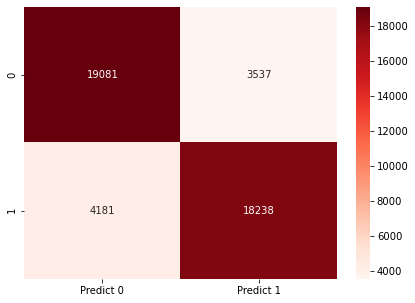

In [64]:
cm=metrics.confusion_matrix(y_test, y_pred_CART, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Reds ,fmt='g')

#Store the training & testing score results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['DecisionTreeClassifier'], 'Training score': CART.score(X_train, y_train), 
                          'Testing score': CART.score(X_test, y_test)})
resultsDf = resultsDf[['Method', 'Training score','Testing score']]
resultsDf

In [65]:
ET = ExtraTreesClassifier(n_estimators= 500, random_state=42, n_jobs=-1)
ET = ET.fit(X_train, y_train)
y_pred_ET = ET.predict(X_test)
print(classification_report(y_test,y_pred_ET))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     22419
         1.0       0.96      0.86      0.90     22618

    accuracy                           0.91     45037
   macro avg       0.91      0.91      0.91     45037
weighted avg       0.91      0.91      0.91     45037



,Method,Training score,Testing score
0,DecisionTreeClassifier,1.0,0.828630
0,ExtraTreesClassifier,1.0,0.909319


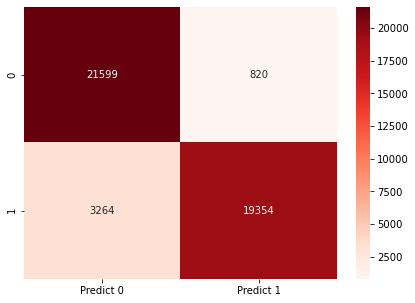

In [66]:
cm=metrics.confusion_matrix(y_test, y_pred_ET, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Reds ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['ExtraTreesClassifier'], 'Training score': ET.score(X_train, y_train), 
                              'Testing score': ET.score(X_test, y_test)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training score','Testing score']]
resultsDf

In [67]:
RF = RandomForestClassifier(criterion='entropy', random_state=42)
RF = RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     22419
         1.0       0.95      0.83      0.89     22618

    accuracy                           0.90     45037
   macro avg       0.90      0.90      0.90     45037
weighted avg       0.90      0.90      0.90     45037



,Method,Training score,Testing score
0,DecisionTreeClassifier,1.0,0.828630
0,ExtraTreesClassifier,1.0,0.909319
0,RandomForestClassifier,1.0,0.896485


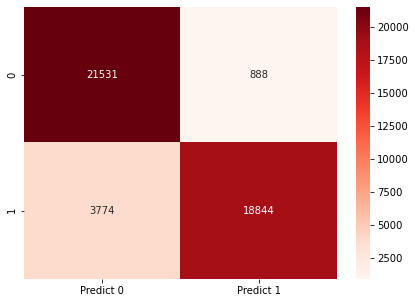

In [68]:
cm=metrics.confusion_matrix(y_test, y_pred_RF, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Reds ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['RandomForestClassifier'], 'Training score': RF.score(X_train, y_train), 
                              'Testing score': RF.score(X_test, y_test)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training score','Testing score']]
resultsDf

In [69]:
BC = BaggingClassifier(base_estimator=CART, n_estimators=50,random_state=42)
BC = BC.fit(X_train, y_train)
y_pred_BC = BC.predict(X_test)
print(classification_report(y_test,y_pred_BC))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     22419
         1.0       0.93      0.83      0.88     22618

    accuracy                           0.89     45037
   macro avg       0.89      0.89      0.89     45037
weighted avg       0.89      0.89      0.89     45037



,Method,Training score,Testing score
0,DecisionTreeClassifier,1.000000,0.828630
0,ExtraTreesClassifier,1.000000,0.909319
0,RandomForestClassifier,1.000000,0.896485
0,BaggingClassifier,0.999874,0.885472


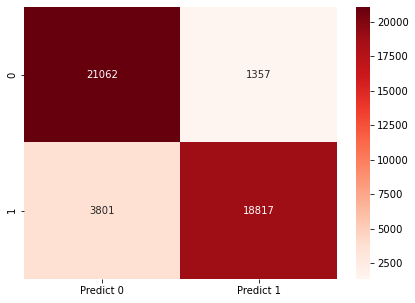

In [70]:
cm=metrics.confusion_matrix(y_test, y_pred_BC, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Reds ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['BaggingClassifier'], 'Training score': BC.score(X_train, y_train), 
                              'Testing score': BC.score(X_test, y_test)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training score','Testing score']]
resultsDf

In [71]:
XGB = xgb.XGBClassifier(n_estimators= 2000, random_state=42)
XGB.fit(X_train,y_train)
y_pred_XGB = XGB.predict(X_test)
print(classification_report(y_test,y_pred_XGB))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     22419
         1.0       0.95      0.88      0.91     22618

    accuracy                           0.91     45037
   macro avg       0.92      0.91      0.91     45037
weighted avg       0.92      0.91      0.91     45037



,Method,Training score,Testing score
0,DecisionTreeClassifier,1.000000,0.828630
0,ExtraTreesClassifier,1.000000,0.909319
0,RandomForestClassifier,1.000000,0.896485
0,BaggingClassifier,0.999874,0.885472
0,XGBClassifier,0.988817,0.914692


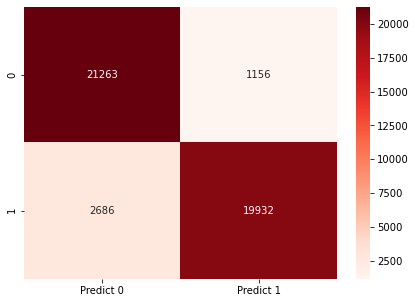

In [72]:
cm=metrics.confusion_matrix(y_test, y_pred_XGB, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Reds ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['XGBClassifier'], 'Training score': XGB.score(X_train, y_train), 
                              'Testing score': XGB.score(X_test, y_test)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training score','Testing score']]
resultsDf

## 3.3 Feature Importances

In [73]:
#Features number 5 (weather_conditions) and number 4 (light_conditions) hav been identified as least important 
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<AxesSubplot:>

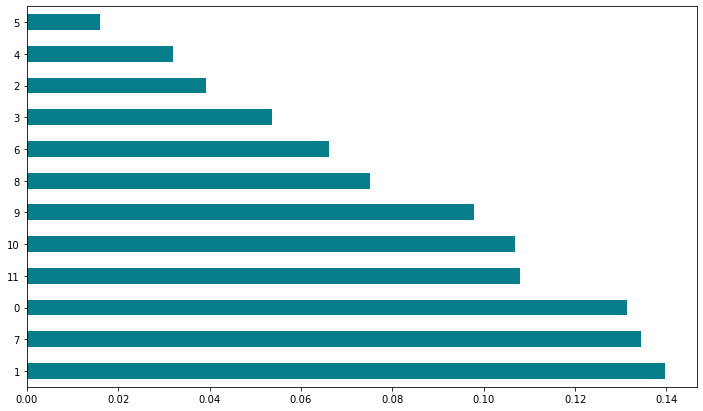

In [74]:
feature_imp(X, CART).plot(kind='barh', figsize=(12,7), color = '#087E8B' , legend=False)

<AxesSubplot:>

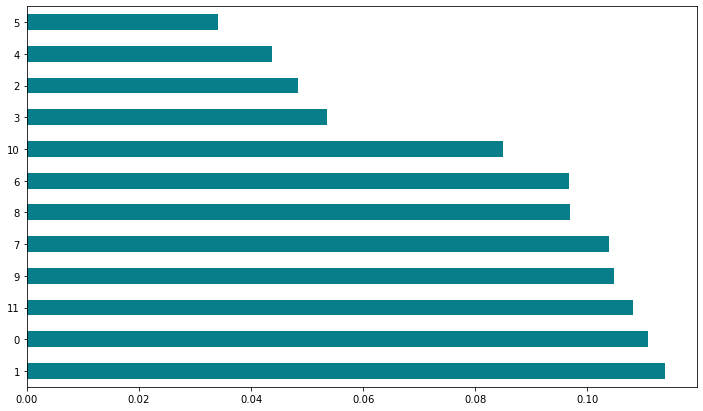

In [75]:
feature_imp(X, ET).plot(kind='barh', figsize=(12,7), color = '#087E8B', legend=False)

<AxesSubplot:>

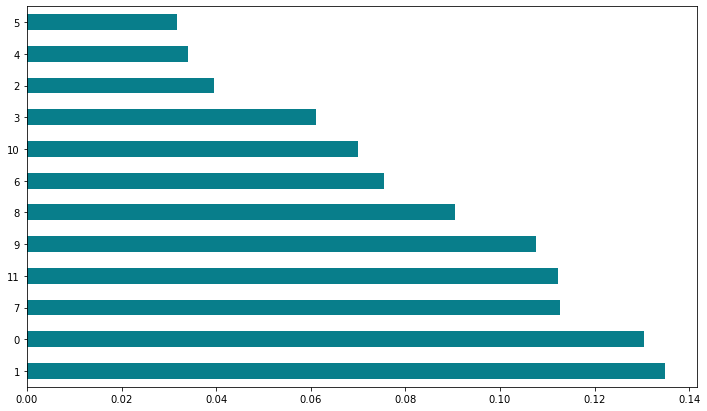

In [76]:
feature_imp(X, RF).plot(kind='barh', figsize=(12,7), color = '#087E8B', legend=False)

## 3.4 Tuning Hyperparameters

In [77]:
#Random Forest, tried variable parameters:
#n_estimators: 100, 150, 300 ; max_depth: 36, 72, 108 ; min_samples_split: 5, 10 ; bootstrap: false, True
#min_samples_split: 2,5
param_grid = {'n_estimators': [300],
    'max_depth': [36 , 72],
    'min_samples_split': [5]
}

# we'll use 5-fold cross-validation, -1 n_jobs to use all processors
grid_search = GridSearchCV(RF, param_grid, cv=5, n_jobs = -1,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time() - start
print(f"Took {end} seconds")

Took 449.2877161502838 seconds


In [78]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=72, min_samples_split=5,
                       n_estimators=300, random_state=42)

In [79]:
grid_search.best_score_

0.8844305924046214

In [80]:
#showed some improvement, will use RF2 with following parameters moving forward
RF2 = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=72,n_estimators=300, random_state=42,
                            n_jobs=-1)
RF2 = RF2.fit(X_train, y_train)
y_pred_RF2 = RF2.predict(X_test)
print(classification_report(y_test,y_pred_RF2))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     22419
         1.0       0.96      0.84      0.89     22618

    accuracy                           0.90     45037
   macro avg       0.91      0.90      0.90     45037
weighted avg       0.91      0.90      0.90     45037



In [81]:
RF2.score(X_train, y_train), RF2.score(X_test, y_test)

(1.0, 0.9000821546728246)

<font color='red'> **Due to computational limitation, the grid search was not effective on XGBClassifier, and ExtraTreeClassifier.<br> Tried manually and evaluated performance of hyperparameters**</font>

In [82]:
#No improvement with n_estimators of 1000 compared to 500, will try 1,000 and evaluate
ET1000 = ExtraTreesClassifier(n_estimators= 1000, random_state=42, n_jobs=-1)
ET1000 = ET1000.fit(X_train, y_train)
y_pred_ET1000 = ET1000.predict(X_test)
print(classification_report(y_test,y_pred_ET1000))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     22419
         1.0       0.96      0.85      0.90     22618

    accuracy                           0.91     45037
   macro avg       0.91      0.91      0.91     45037
weighted avg       0.91      0.91      0.91     45037



In [83]:
#No improvement with n_estimators of 2000 compared to 500, will stick to 500 moving forward
ET2000 = ExtraTreesClassifier(n_estimators= 2000, random_state=42, n_jobs=-1)
ET2000 = ET2000.fit(X_train, y_train)
y_pred_ET2000 = ET2000.predict(X_test)
print(classification_report(y_test,y_pred_ET2000))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     22419
         1.0       0.96      0.86      0.90     22618

    accuracy                           0.91     45037
   macro avg       0.91      0.91      0.91     45037
weighted avg       0.91      0.91      0.91     45037



In [84]:
#worse performance with n_estimators of 500 compared to 2000, will stick to 2000 moving forward
XGB500 = xgb.XGBClassifier(n_estimators= 500)
XGB500.fit(X_train,y_train)
y_pred_XGB500 = XGB500.predict(X_test)
print(classification_report(y_test,y_pred_XGB500))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     22419
         1.0       0.94      0.82      0.88     22618

    accuracy                           0.88     45037
   macro avg       0.89      0.88      0.88     45037
weighted avg       0.89      0.88      0.88     45037



## 3.4 Ensemble Voting

In [85]:
#Tried Soft and Hard Voting
VCS = VotingClassifier(estimators=[('RandomForest', RF2), ('XGBClassifier', XGB), ('ExtraTree', ET)],
                     voting='soft', n_jobs=-1)
VCS.fit(X_train, y_train)
y_pred_VCS = VCS.predict(X_test)
print(classification_report(y_test, y_pred_VCS))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     22419
         1.0       0.97      0.87      0.91     22618

    accuracy                           0.92     45037
   macro avg       0.92      0.92      0.92     45037
weighted avg       0.92      0.92      0.92     45037



,Method,Training score,Testing score
0,DecisionTreeClassifier,1.000000,0.828630
0,ExtraTreesClassifier,1.000000,0.909319
0,RandomForestClassifier,1.000000,0.896485
0,BaggingClassifier,0.999874,0.885472
0,XGBClassifier,0.988817,0.914692
0,VotingClassifier,1.000000,0.918201


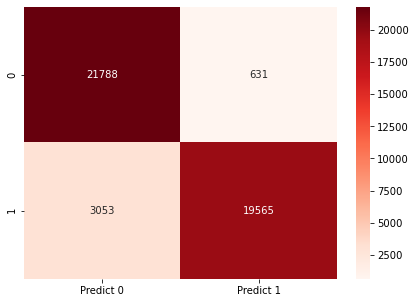

In [86]:
cm=metrics.confusion_matrix(y_test, y_pred_VCS, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Reds ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['VotingClassifier'], 'Training score': VCS.score(X_train, y_train), 
                              'Testing score': VCS.score(X_test, y_test)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training score','Testing score']]
resultsDf

## 3.5 Principal Components Analysis

In [87]:
RF_pca = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=72,n_estimators=300, random_state=42,
                            n_jobs=-1)
RF_pca = RF_pca.fit(X_train_pca, y_train)
y_pred_RF_pca = RF_pca.predict(X_test_pca)
print(classification_report(y_test,y_pred_RF_pca))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83     22419
         1.0       0.83      0.83      0.83     22618

    accuracy                           0.83     45037
   macro avg       0.83      0.83      0.83     45037
weighted avg       0.83      0.83      0.83     45037



In [88]:
ET_pca = ExtraTreesClassifier(n_estimators= 500, random_state=42, n_jobs=-1)
ET_pca = ET_pca.fit(X_train_pca, y_train)
y_pred_ET_pca = ET_pca.predict(X_test_pca)
print(classification_report(y_test,y_pred_ET_pca))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83     22419
         1.0       0.84      0.83      0.84     22618

    accuracy                           0.83     45037
   macro avg       0.83      0.83      0.83     45037
weighted avg       0.83      0.83      0.83     45037



In [90]:
XGB_pca = xgb.XGBClassifier(n_estimators= 2000, random_state=42)
XGB_pca.fit(X_train_pca,y_train)
y_pred_XGB_pca = XGB_pca.predict(X_test_pca)
print(classification_report(y_test,y_pred_XGB_pca))

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75     22419
         1.0       0.76      0.75      0.75     22618

    accuracy                           0.75     45037
   macro avg       0.75      0.75      0.75     45037
weighted avg       0.75      0.75      0.75     45037



In [91]:
#The PCA didn't enhance performance due to the limited number of features in the initial df
VCS_pca = VotingClassifier(estimators=[('RandomForest', RF_pca), ('XGBClassifier', XGB_pca), ('ExtraTree', ET_pca)],
                     voting='soft', n_jobs=-1)
VCS_pca.fit(X_train_pca, y_train)
y_pred_VCS_pca = VCS_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_VCS_pca))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82     22419
         1.0       0.82      0.82      0.82     22618

    accuracy                           0.82     45037
   macro avg       0.82      0.82      0.82     45037
weighted avg       0.82      0.82      0.82     45037



,Method,Training score,Testing score
0,DecisionTreeClassifier,1.000000,0.828630
0,ExtraTreesClassifier,1.000000,0.909319
0,RandomForestClassifier,1.000000,0.896485
0,BaggingClassifier,0.999874,0.885472
0,XGBClassifier,0.988817,0.914692
0,VotingClassifier,1.000000,0.918201
0,ExtraTree+PCA,1.000000,0.818105


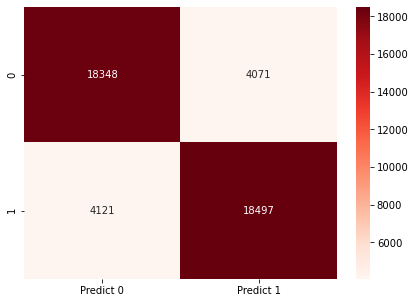

In [92]:
#The Voting Classifier Ensemble showed the best performance, however XGBVlassifier is faster with closed results
cm=metrics.confusion_matrix(y_test, y_pred_VCS_pca, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,cmap=plt.cm.Reds ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['Voting+PCA'], 'Training score': VCS_pca.score(X_train_pca, y_train), 
                              'Testing score': VCS_pca.score(X_test_pca, y_test)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training score','Testing score']]
resultsDf

## 3.6 Sort Important features

In [93]:
#The final step is to eliminate the least important features and evaluate the performance of algorithms
df_new = df.drop('weather_conditions', axis=1) 
df_new = df_new.drop('light_conditions', axis=1) 

In [94]:
df_new = df_new.astype(float) 
X_new = df_new.drop('accident_severity',axis=1)     # Set feature vector
y_new = df_new['accident_severity']   #Set Target variable

In [95]:
sm_new = SMOTE(random_state=42)
X_new_sm, y_new_sm = sm_new.fit_resample(X_new, y_new)

In [96]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_sm, y_new_sm, 
                                                                    test_size=0.25 ,random_state=42)

In [97]:
mms_new = MinMaxScaler() 
X_new_train = mms_new.fit_transform(X_new_train)
X_new_test = mms_new.transform(X_new_test)

In [98]:
# Will use the XGBClassifier as it has achieved outstanding results with faster training time
XGB_new = xgb.XGBClassifier(n_estimators= 2000, random_state=42)
XGB_new.fit(X_new_train,y_new_train)
y_pred_XGB_new = XGB_new.predict(X_new_test)
print(classification_report(y_new_test,y_pred_XGB_new))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     22419
         1.0       0.95      0.88      0.91     22618

    accuracy                           0.91     45037
   macro avg       0.91      0.91      0.91     45037
weighted avg       0.91      0.91      0.91     45037



# Section-4: Conclusion

In this project, we had to target to develop a machine learning model to identify accident severity with minimal information reported possible. This application will benefit emergency team to optimize resources and capabilities, also it will benefit society as well. Initial features have been selected based on relevant papers that exploited this topic earlier and it was subject to availability at GOV.UK website. Features were distributed in multiple datasets that required a merge by using primary key. Following data selection, Data Exploration and Cleaning have been performed to reduce noise and bias in machine learning models. The main challenge was data imbalance as appeared in previous research as well, for this reason oversampling technique has been applied by using SMOTE ()as it showed better results compared to other oversampling, undersampling and even stratified train test split. The Dataframe was subject to Normalization with MinMaxScaler() as features have different scales that might affect weight and bias when processed by the model. <br><br>

The data have been processed using a baseline function which included an ensemble of baseline ML models for classification. This function had showed best performing models by using grid search and cross-validation techniques on training data. The selected models have been processed on test data to analyze the performance on unseen data, results have been plotted by using confusing matrix and evaluated by using precision, recall and f1-score. Tuning hyperparameters required high computational power specially for ensemble models due to complexity of these algorithms. However, depsite the limitation of laptop hardware, a gird search/cross validation has been applied on random forest to identify better hyperparameters and to prove the concept in this exercise. Tuning hyperparameters of ensemble has been done manually in this execise by it can be done using same techniques if a cloud infrastructure is available for the user. <br><br>

The best three performing models were RandomForest (RF2), XGBClassifier (XGB), and ExtraTreeClassifier (ET). These models has been combined in an ensemble model called VotingClassifier (VT) that achieved the best testing score. However, it worth to mention the long training time for such models that require extra computational power, time as well but without significant improvements. This notebook has exploited the robust results of XGBClassifier (XGB) and ExtraTreeClassifier (ET) compared to the RandomForest (RF). It is recommended to seize some additional research in this area by using these ensemble classifiers that have high potential to improve results. <br><br>

The next section of this notebook included the usage of Principal Components Analysis which has been used to reduce the dimensionality of the dataset by 33% to 8 features. The reduced features have been processed by the ExtraTreeClassifier (ET) and showed less performance (10%) compared to the same algorithm when used without PCA. The PCA might not be suitable for small features (12 components) but it could be an application to dicover in future when combining the three original datasets or when we have very high number of independent variables. <br><br>

Finally, features have been sorted based on importance in classification algortihms used and 2 features have been eliminated from original dataset. The same methodology have been followed in terms of oversampling, train/test split and normalization. These new dataset has been processed using the XGBClassifier wihout compromising the performance. The application is now ready to explore on live data by using some seamless features for the public user such as:<br>
1- Longitude: Location can be integrated without friction in the application. <br>
2- Latitude: Location can be integrated without friction in the application. <br>
3- Speed limit: Response team can identify it using shared location. <br>
4- Road Surface Conditions: Add a feature of selection using categorical options to ensure better reporting. <br>
5- Day of week: Detected authomatically through an event log within the application. <br>
6- Casualty Class: Add a feature of selection using categorical options to ensure better reporting. <br>
7- Age of Vehicle: Manual entry of plate number which might cause some wrong entries <br>
8- Age of Driver: Manual entry of plate number which might cause some wrong entries <br>
9- Sec of Drive: Manual entry of plate number which might cause some wrong entries <br>
10- Engine_Capacity: Manual entry of plate number which might cause some wrong entries <br>
The application requires some categorical entry by the user in the form of multiple choices for Road Surface Conditions and Cusualty Class, also some manual entry for plate number. The application will leverage machine learning to predict the accident severity.